In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=889a80a95faecfbd77739d9a82828a5a9fa9595e7d682eb53062991e4d750579
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found 

In [3]:

from roboflow import Roboflow
rf = Roboflow(api_key="your_code")
project = rf.workspace("sharan-shankar-folzo").project("aquarium-ck0at")
dataset = project.version(1).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.


Extracting Dataset Version Zip to Aquarium-1 in yolov8:: 100%|██████████| 1286/1286 [00:00<00:00, 2618.25it/s]


In [4]:
%pip install ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.6/613.6 kB 8.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

In [13]:
train_images = "/kaggle/working/Aquarium-1/train/images"
train_labels = "/kaggle/working/Aquarium-1/train/labels"

val_images = "/kaggle/working/Aquarium-1/valid/images"
val_labels = "/kaggle/working/Aquarium-1/valid/labels"

test_images = "/kaggle/working/Aquarium-1/test/images"
test_labels = "/kaggle/working/Aquarium-1/test/labels"

In [14]:
train_data_description = os.listdir(train_images)

train_image_file_paths = [os.path.join(train_images,i) for i in train_data_description if '.jpg' in i]
len(train_image_file_paths)

446

In [15]:
val_data_description = os.listdir(val_images)

val_image_file_paths = [os.path.join(val_images,i) for i in val_data_description if '.jpg' in i]
len(val_image_file_paths)

128

In [16]:
train_data_description = os.listdir(test_images)

train_image_file_paths = [os.path.join(test_images,i) for i in train_data_description if '.jpg' in i]
len(train_image_file_paths)

63

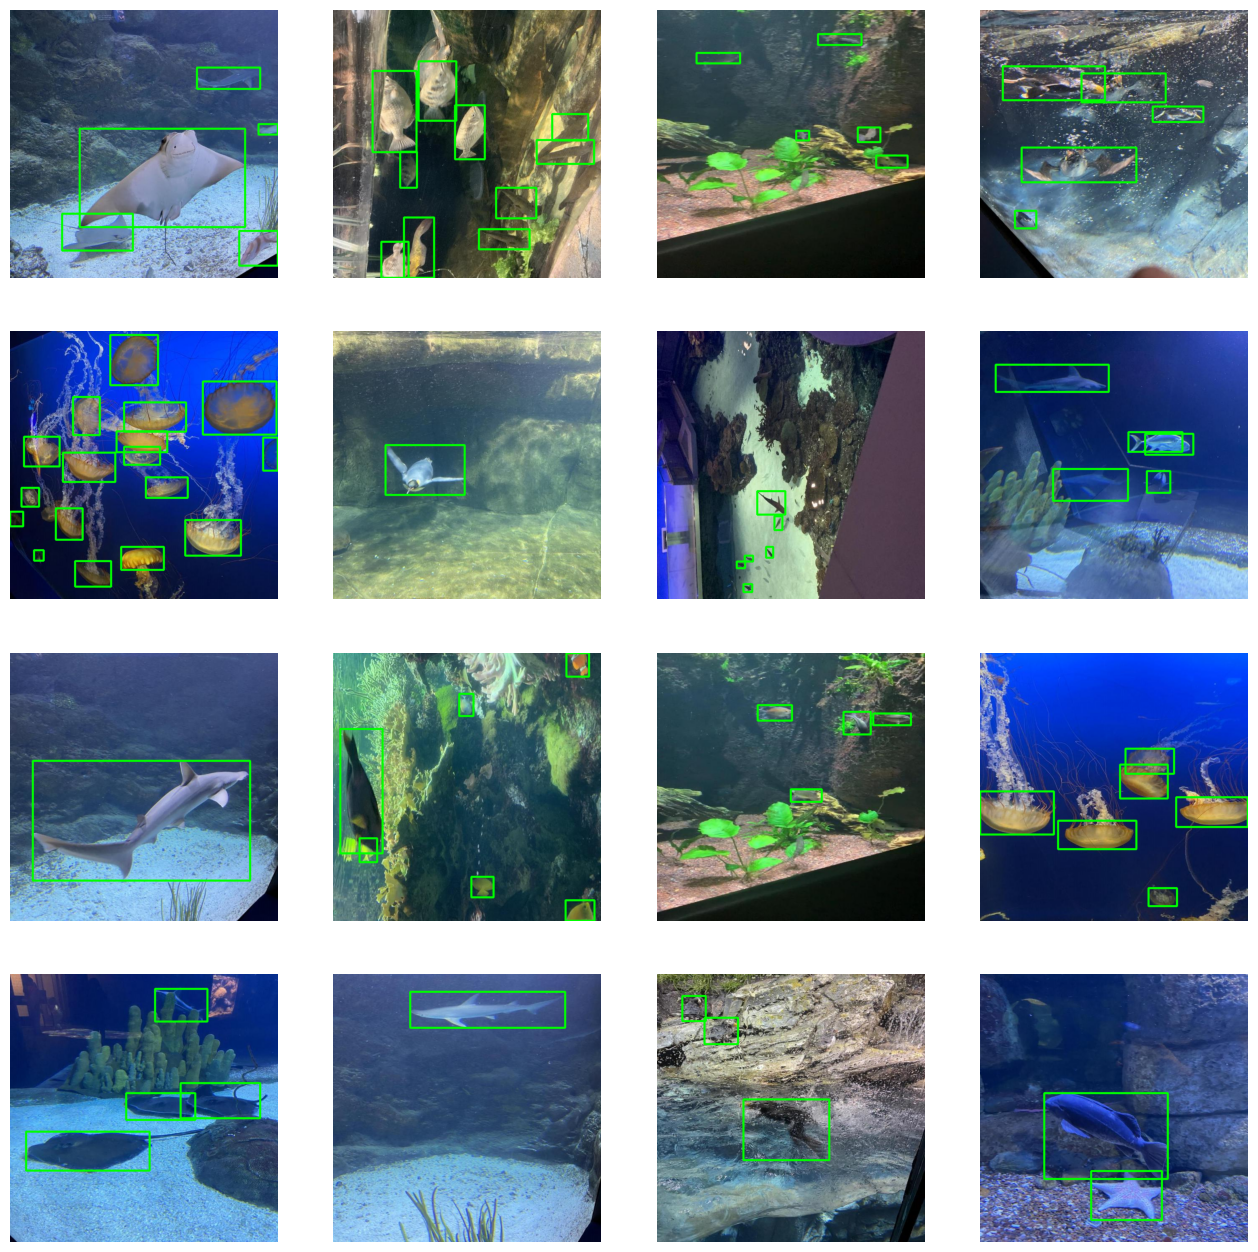

In [17]:
# Get training images dir
image_files = os.listdir(train_images)

random_images = random.sample(image_files, 16)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    
    # Loop over the labels
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

     #show
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [18]:
image = cv2.imread("/kaggle/working/Aquarium-1/test/images/IMG_2521_jpeg_jpg.rf.365cc222e9bffde1a6eeedd62f9cf7f9.jpg")

height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 640x640 and 3 channels.


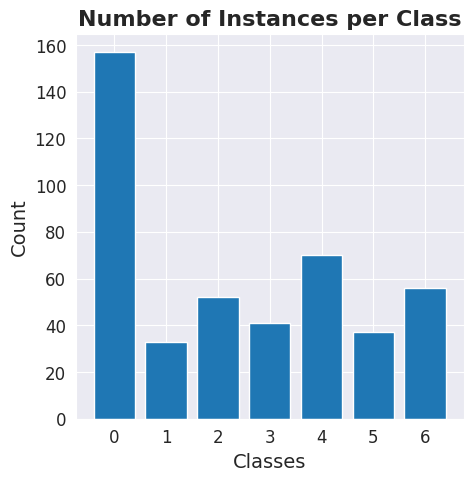

In [19]:
import os
import cv2
import matplotlib.pyplot as plt

train_images = "/kaggle/working/Aquarium-1/train/images"
train_labels = "/kaggle/working/Aquarium-1/train/labels"

image_files = os.listdir(train_images)

class_counts = {}

for image_file in image_files:
    # Load the image
    image_path = os.path.join(train_images, image_file)

    # Load labels for image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")[0].split()

    if len(labels) != 5:
        continue

    class_id = int(labels[0])
#         print(class_id)
    class_counts[class_id] = class_counts.get(class_id, 0) + 1

# Extract labels, counts from the dictionary

class_labels = []
class_counts_list = []
for class_id, count in class_counts.items():
    class_labels.append(class_id)
    class_counts_list.append(count)

plt.figure(figsize=(5, 5))

plt.bar(class_labels, class_counts_list)
plt.title("Number of Instances per Class", fontweight="bold", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [20]:
with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")
        print(f.read().split())
# label_path

[]


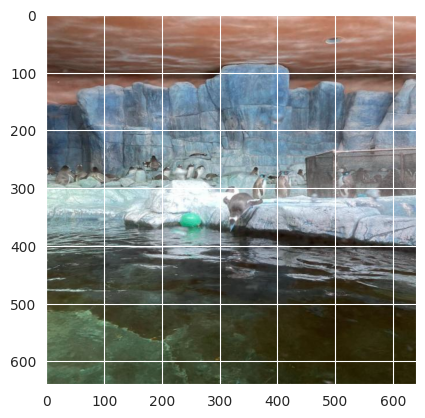

In [21]:
plt.imshow(cv2.imread(image_path))
# image_path

In [22]:
class_counts_list

[37, 157, 52, 41, 70, 56, 33]

In [23]:
pip install imgaug

Note: you may need to restart the kernel to use updated packages.


In [ ]:
"""import os
import cv2
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa

train_images = "/kaggle/working/Aquarium-1/train/images"
train_labels = "/kaggle/working/Aquarium-1/train/labels"

image_files = os.listdir(train_images)

class_counts = {}

for image_file in image_files:
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")[0].split()

    if len(labels) != 5:
        continue

    class_id = int(labels[0])
    class_counts[class_id] = class_counts.get(class_id, 0) + 1

class_labels = []
class_counts_list = []
for class_id, count in class_counts.items():
    class_labels.append(class_id)
    class_counts_list.append(count)

# Apply augmentation 
augmented_data = []
augmentation_exclude_class = 0  # Exclude class 0 from augmentation

for image_file in image_files:
    image_path = os.path.join(train_images, image_file)
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")[0].split()

    if len(labels) != 5:
        continue

    class_id = int(labels[0])

    if class_id != augmentation_exclude_class:
        augmenter = iaa.Sequential([
              iaa.Fliplr(0.5),
              iaa.Flipud(0.5),
              iaa.Multiply((0.8, 1.2)),
        ])

        augmented_image = augmenter.augment_image(image)
        augmented_data.append((class_id, augmented_image))

output_dir = "/kaggle/working/Augmented_Data"
os.makedirs(output_dir, exist_ok=True)

for class_id, augmented_image in augmented_data:
    output_path = os.path.join(output_dir, f"class_{class_id}_augmented.png")
    cv2.imwrite(output_path, augmented_image)

# Save class 0 data
for image_file in image_files:
    image_path = os.path.join(train_images, image_file)
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")[0].split()

    if len(labels) != 5:
        continue

    class_id = int(labels[0])

    if class_id == augmentation_exclude_class:
        output_path = os.path.join(output_dir, f"class_{class_id}.png")
        image = cv2.imread(image_path)
        cv2.imwrite(output_path, image)

augmented_class_labels = [class_id for class_id, _ in augmented_data]
augmented_class_counts_list = [class_counts.get(class_id, 0) for class_id in augmented_class_labels]

class_labels.append(augmentation_exclude_class)
class_counts_list.append(class_counts.get(augmentation_exclude_class, 0))

"""plt.figure(figsize=(10, 6))

plt.bar(class_labels, class_counts_list, label='Original Data')
plt.bar(augmented_class_labels, augmented_class_counts_list, label='Augmented Data')

plt.title("Number of Instances per Class", fontweight="bold", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.show()""""""

In [ ]:
"""# Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/kaggle/input/yml-file/data.yaml',
            epochs = 50,
            imgsz = height,
            seed = 42,
            patience=5,
            save=True,
            batch = 15,
            workers = 4)"""

In [26]:
model = YOLO('yolov8x.pt')

model.train(data = '/kaggle/input/yamaaal/data (1).yaml',
            epochs = 50,
            imgsz = height,
            seed = 42,
            #patience=5,
            #save=True,
            batch = 15,
            workers = 4)

#runs/detect/train3/weights/best.pt    >>20 epoch
#runs/detect/train2/weights/best.pt    >>50 epoch

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/yamaaal/data (1).yaml, epochs=50, patience=50, batch=15, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
cat: /sys/module/amdgpu/initstate: No such file or directory


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
100%|██████████| 6.23M/6.23M [00:00<00:00, 62.0MB/s]
AMP: checks passed ✅
train: Scanning /kaggle/working/Aquarium-1/train/labels... 446 images, 0 backgrounds, 0 corrupt: 100%|██████████| 446/446 [00:00<00:00, 1259.90it/s]
train: New cache created: /kaggle/working/Aquarium-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/working/Aquarium-1/valid/labels... 128 images, 0 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1532.07it/s]
val: New cache created: /kaggle/working/Aquarium-1/valid/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00046875), 103 bias(decay=0.0)
Image sizes 640 train, 64

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79a3c01a03a0>
fitness: 0.5128038250567296
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.45652,     0.52264,     0.35285,     0.35139,      0.4429,     0.67249,     0.57289])
names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6'}
plot: False
results_dict: {'metrics/precision(B)': 0.7973610950659186, 'metrics/recall(B)': 0.7330791623449161, 'metrics/mAP50(B)': 0.7930199255644713, 'metrics/mAP50-95(B)': 0.48166870277809165, 'fitness': 0.5128038250567296}
save_dir: PosixPath('runs/detect/train3')
speed: {'preprocess': 0.17008930444717407, 'inference': 27.881691232323647, 'loss': 0.0009201467037200928, 'postprocess': 1.0426528751850128}

model performance

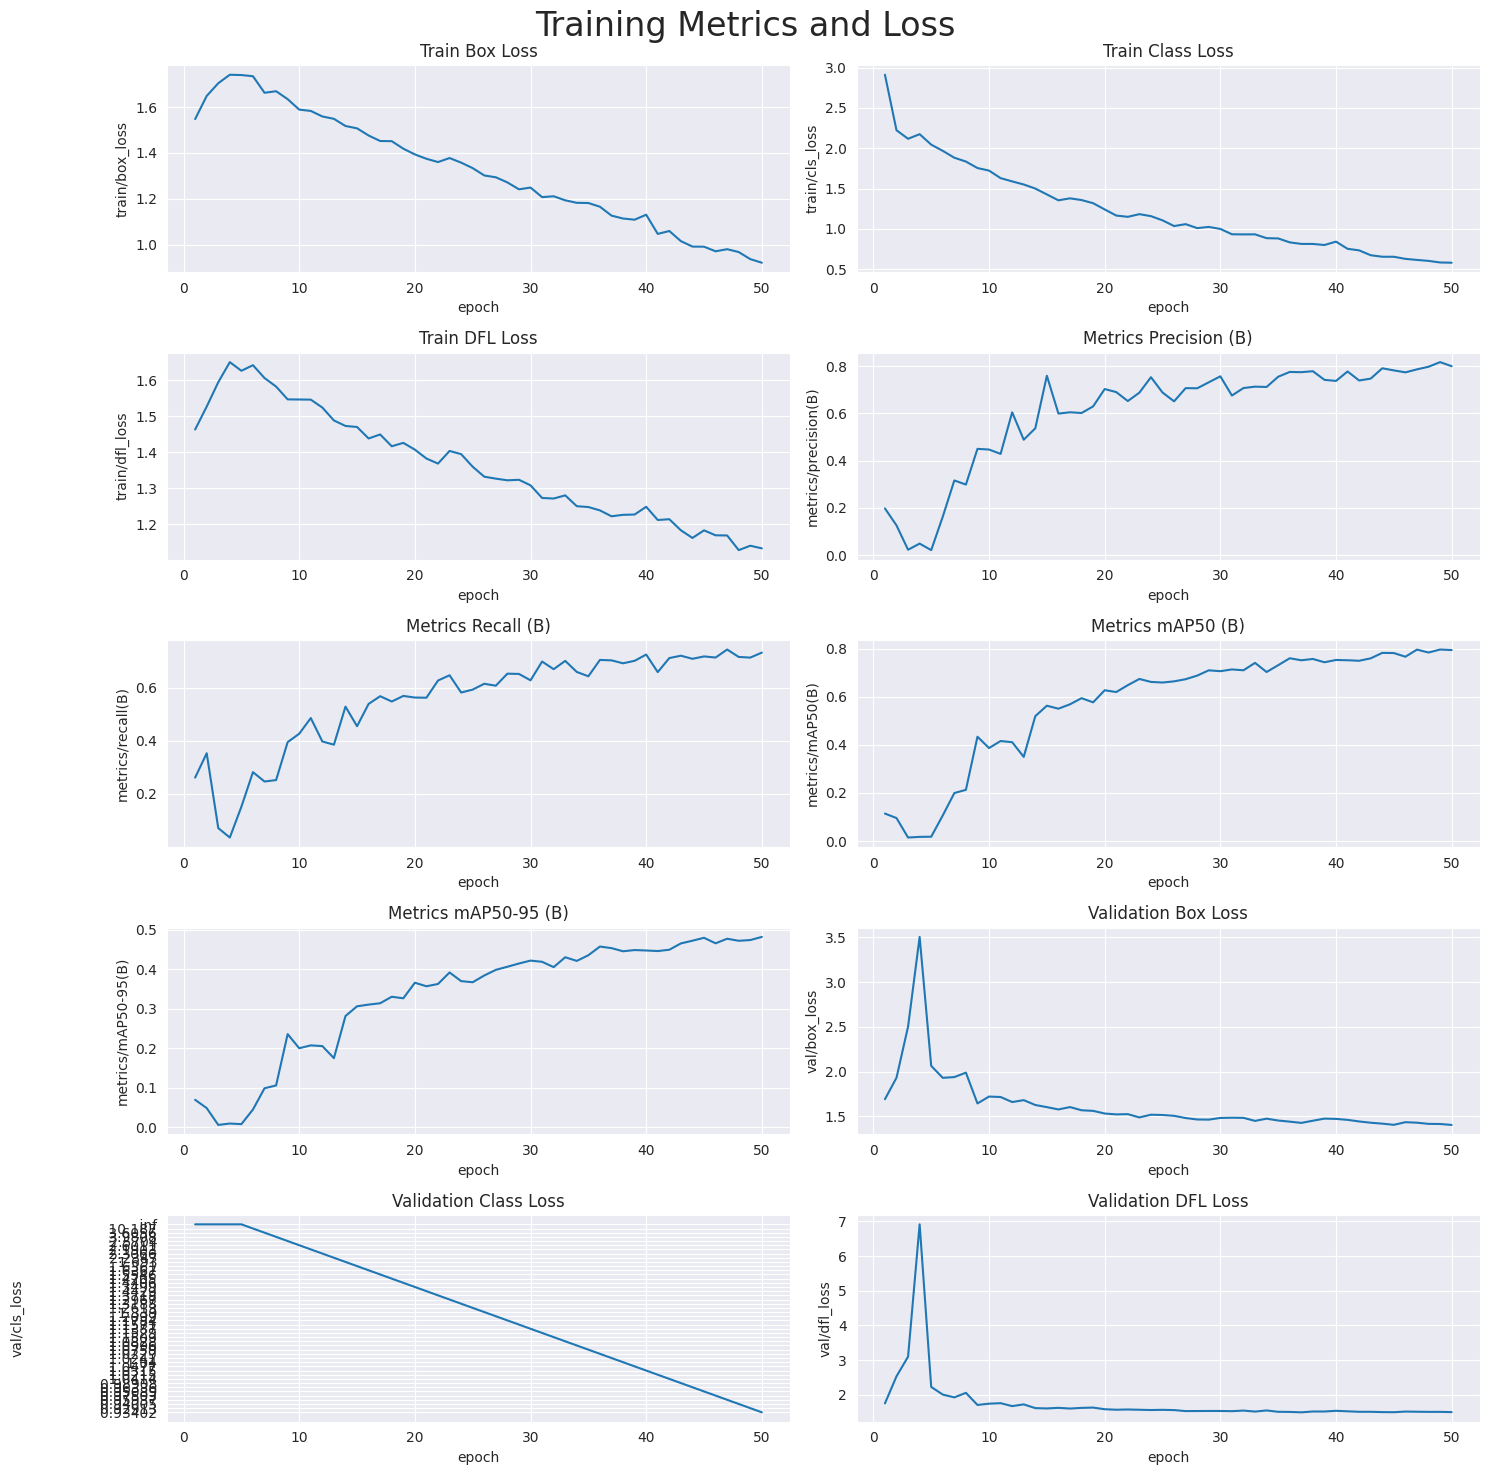

In [27]:
%matplotlib inline

df = pd.read_csv('/kaggle/working/runs/detect/train3/results.csv')
df.columns = df.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])

sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])

sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])



axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')

axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')

axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()

plt.show()

In [ ]:
#runs/detect/train2/weights/best.pt

evaluate

In [28]:
%matplotlib inline
#/kaggle/working/runs/detect/train13

#'/kaggle/working/runs/detect/train/weights/best.pt'
model = YOLO('/kaggle/working/runs/detect/train3/weights/best.pt')

metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 68130309 parameters, 0 gradients
val: Scanning /kaggle/working/Aquarium-1/test/labels... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 692.45it/s]
val: New cache created: /kaggle/working/Aquarium-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.51s/it]
                   all         63        578      0.787      0.702      0.795      0.537
                     0         63        357      0.873      0.711      0.823      0.498
                     1         63         69      0.953       0.88       0.94      0.681
                     2         63         48      0.856      0.792      0.843      0.353
                     3         63         38      0.724      0.552      0.701      0.394
                     4         63         42      0.836   

In [ ]:
#Results saved to runs/detect/val      >>val     6 epoch

#runs/detect/val     20epoch

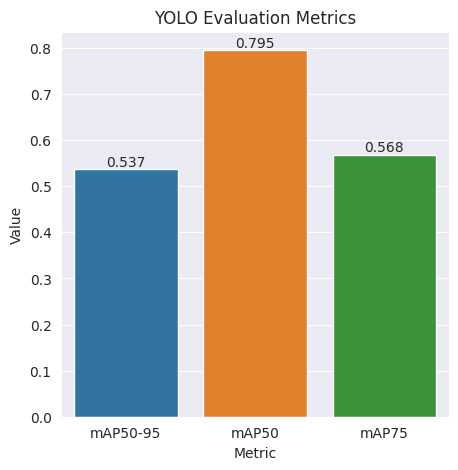

In [29]:
%matplotlib inline

ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

fig = plt.gcf()
fig.set_size_inches(5, 5)

for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
plt.show()

test


In [30]:
def img_detect(img_path):
    
    img = cv2.imread(img_path)
    detect_result = model(img)
    detect_img = detect_result[0].plot()
    
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 640x640 2 0s, 86.7ms
Speed: 5.6ms preprocess, 86.7ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 5, 55.1ms
Speed: 2.9ms preprocess, 55.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 28 0s, 4 4s, 1 6, 55.5ms
Speed: 2.3ms preprocess, 55.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 3s, 52.3ms
Speed: 2.7ms preprocess, 52.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 0s, 53.2ms
Speed: 3.3ms preprocess, 53.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 2 6s, 53.8ms
Speed: 3.1ms preprocess, 53.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 0s, 1 4, 54.2ms
Speed: 2.3ms preprocess, 54.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 7 3s, 54.4ms
Speed: 3.0ms preprocess, 54.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 6

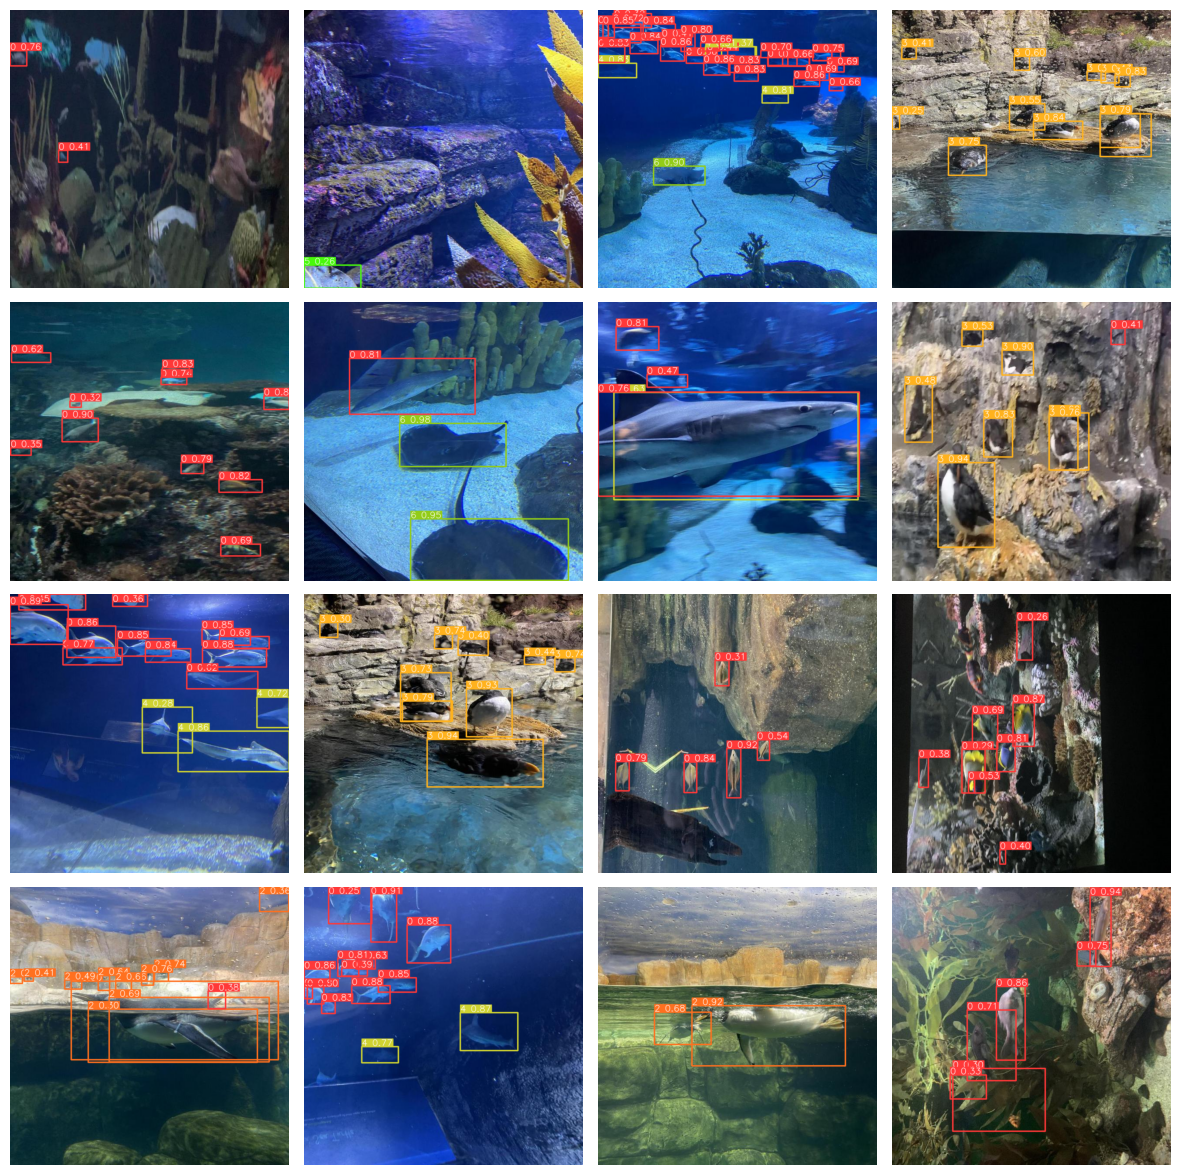

In [31]:
import random
custom_image_dir = '/kaggle/working/Aquarium-1/test/images'

image_files = os.listdir(custom_image_dir)
selected_images = random.sample(image_files, 16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):

    row_idx = i // 4
    col_idx = i % 4
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = img_detect(img_path)
    
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
"""0>>fish
1>>kandil
2>>btrek
3>>bg3a
4>>shark
5>>starfish
6>>nemo bus"""

deploy

In [ ]:
"""os.mkdir("datasets")"""

In [ ]:
"""!mkdir {HOME}/datasets"""

In [32]:
from ultralytics import YOLO
import ultralytics 

In [37]:
#dataset.version
project.version(1).deploy(model_type="yolov8",model_path=f'/kaggle/working/runs/detect/train3')

Dependency ultralytics==8.0.134 is required but found version=8.0.169, to fix: `pip install ultralytics==8.0.134`
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/sharan-shankar-folzo/aquarium-ck0at/1/uploadModel?api_key=DgsPJdewnZn9ud9JaG9S&modelType=yolov8&nocache=true


In [ ]:
import requests

api_key = 'your_code'
url = 'https://api.roboflow.com/'
headers = {'Authorization': f'Bearer {api_key}'}

response = requests.get(url, headers=headers)
print(response.json())

In [ ]:
import requests

api_key = 'your_code'
url = 'https://api.roboflow.com/'
headers = {'Authorization': f'Bearer {api_key}'}

response = requests.get(url, headers=headers)
print(response.json())

In [36]:
!pip install ultralytics==8.0.134


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 10.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.169
    Uninstalling ultralytics-8.0.169:
      Successfully uninstalled ultralytics-8.0.169


In [38]:
#empty img
from roboflow import Roboflow
rf = Roboflow(api_key="your_code")
project = rf.workspace().project("aquarium-ck0at")
model = project.version(1).model

#local img
print(model.predict("/kaggle/working/Aquarium-1/test/images/IMG_2548_jpeg_jpg.rf.e12fda0db473ec0d2c515740317dc331.jpg", confidence=40, overlap=30).json())


loading Roboflow workspace...
loading Roboflow project...
{'predictions': [], 'image': {'width': '640', 'height': '640'}}


In [ ]:
"""import requests as r

r.get("https://api.roboflow.com/workspaces/DgsPJdewnZn9ud9JaG9S", {"api_key": "your_code"}).json()"""

In [39]:
#not empty
from roboflow import Roboflow
rf = Roboflow(api_key="your_code")
project = rf.workspace().project("aquarium-ck0at")
model = project.version(1).model

# local image
print(model.predict("/kaggle/working/Aquarium-1/test/images/IMG_2491_jpeg_jpg.rf.c6eec17766bbbd063e7454efe05a342d.jpg", confidence=40, overlap=30).json())


loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 213.0, 'y': 415.5, 'width': 124.0, 'height': 45.0, 'confidence': 0.9319148063659668, 'class': '1', 'image_path': '/kaggle/working/Aquarium-1/test/images/IMG_2491_jpeg_jpg.rf.c6eec17766bbbd063e7454efe05a342d.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 463.0, 'y': 520.0, 'width': 220.0, 'height': 112.0, 'confidence': 0.9056891202926636, 'class': '1', 'image_path': '/kaggle/working/Aquarium-1/test/images/IMG_2491_jpeg_jpg.rf.c6eec17766bbbd063e7454efe05a342d.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 382.0, 'y': 428.0, 'width': 60.0, 'height': 30.0, 'confidence': 0.8973544836044312, 'class': '1', 'image_path': '/kaggle/working/Aquarium-1/test/images/IMG_2491_jpeg_jpg.rf.c6eec17766bbbd063e7454efe05a342d.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 175.5, 'y': 313.0, 'width': 183.0, 'height': 106.0, 'confidence': 0.880824625492096, 'class': '1', 'image_path': '/kaggle/working/

In [40]:
#visualize prediction
model.predict("/kaggle/working/Aquarium-1/test/images/IMG_2491_jpeg_jpg.rf.c6eec17766bbbd063e7454efe05a342d.jpg", confidence=40, overlap=30).save("prediction2.jpg")


In [41]:
#test img hosted 
print(model.predict("https://media.wired.com/photos/5c6750d23e8add2cdb91724f/master/w_1600,c_limit/shark-551025353.jpg", hosted=True, confidence=40, overlap=30).json())

{'predictions': [{'x': 1234.5, 'y': 463.5, 'width': 291.0, 'height': 127.0, 'confidence': 0.8046046495437622, 'class': '1', 'image_path': 'https://media.wired.com/photos/5c6750d23e8add2cdb91724f/master/w_1600,c_limit/shark-551025353.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 829.5, 'y': 597.5, 'width': 1291.0, 'height': 505.0, 'confidence': 0.6919206380844116, 'class': '6', 'image_path': 'https://media.wired.com/photos/5c6750d23e8add2cdb91724f/master/w_1600,c_limit/shark-551025353.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 839.5, 'y': 601.5, 'width': 1365.0, 'height': 489.0, 'confidence': 0.5756036043167114, 'class': '4', 'image_path': 'https://media.wired.com/photos/5c6750d23e8add2cdb91724f/master/w_1600,c_limit/shark-551025353.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '0', 'height': '0'}}


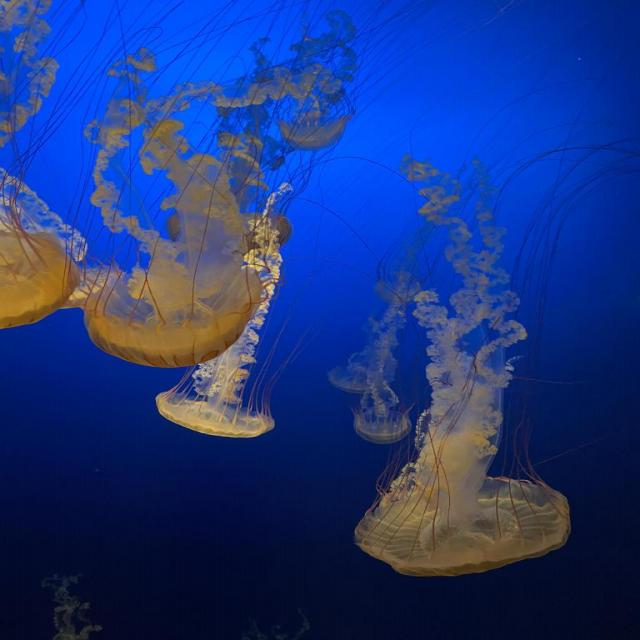

In [42]:
from PIL import Image
img = Image.open("/kaggle/working/Aquarium-1/test/images/IMG_2491_jpeg_jpg.rf.c6eec17766bbbd063e7454efe05a342d.jpg")
img

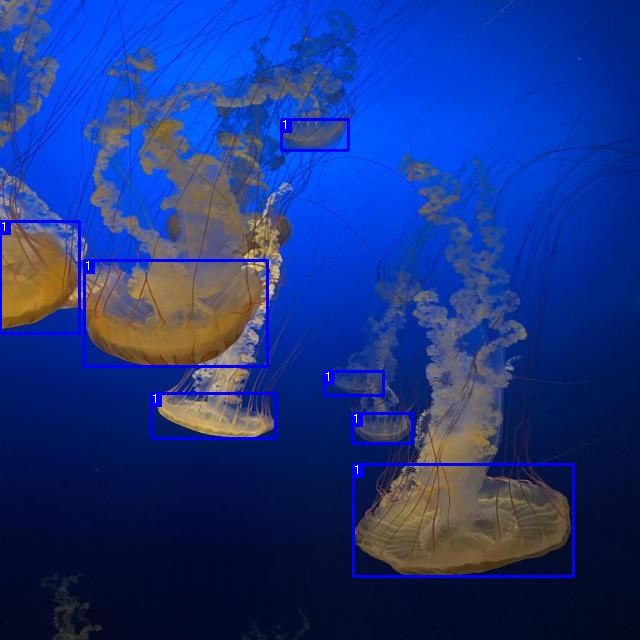

In [45]:
#detected img
from PIL import Image
img = Image.open("/kaggle/working/prediction2.jpg")
img